# Prediction of pulmonary hypertension in patients with fibrosis #

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Path to the data
main_path = '/Users/alechiquito/Documents/osic_db/'

### General information of the dataset 

In [29]:
#Reading the data
main_data = pd.read_csv(f'{main_path}/train.csv')
# Showing the First Five Rows
main_data.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked


In [30]:
# Showing the Last Five Rows
main_data.tail()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
1549,ID00426637202313170790466,13,2712,66.594637,73,Male,Never smoked
1550,ID00426637202313170790466,19,2978,73.126412,73,Male,Never smoked
1551,ID00426637202313170790466,31,2908,71.407524,73,Male,Never smoked
1552,ID00426637202313170790466,43,2975,73.052745,73,Male,Never smoked
1553,ID00426637202313170790466,59,2774,68.117081,73,Male,Never smoked


In [31]:
# Printing Dimensions Of The Data:
num_patients, num_columns = main_data.shape
print("The data contains ", num_patients, " rows and ", num_columns, " columns.")

The data contains  1554  rows and  7  columns.


In [32]:
#Saving the id of the patients in the data
patients_ids = main_data['Patient'].unique()
print("The numbers of patients is: ", patients_ids.shape[0])

The numbers of patients is:  176


In [33]:
main_data.columns

Index(['Patient', 'Weeks', 'FVC', 'Percent', 'Age', 'Sex', 'SmokingStatus'], dtype='object')

In [34]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1554 non-null   object 
 1   Weeks          1554 non-null   int64  
 2   FVC            1554 non-null   int64  
 3   Percent        1554 non-null   float64
 4   Age            1554 non-null   int64  
 5   Sex            1554 non-null   object 
 6   SmokingStatus  1554 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 85.1+ KB


In [35]:
main_data.dtypes

Patient           object
Weeks              int64
FVC                int64
Percent          float64
Age                int64
Sex               object
SmokingStatus     object
dtype: object

In [36]:
# Creating id for every sample
data = main_data
data['Patient'].sort_index(ascending=True, inplace=True)

data['id'] = 0
for i in range(len(main_data)):
    #print(i)
    data['id'][i] = i

data = data.set_index('id')
data.head(15)

/var/folders/qc/0kbw0c7n6cg2vt6xf9gp3g2h0000gn/T/ipykernel_83724/3963253826.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['id'][i] = i


,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
id,,,,,,,
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked
5,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
6,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
7,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
8,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker


In [37]:
#Printing the unique values of sex and SmokingStatus columns
print("Unique values ('Sex'): ", data['Sex'].unique())
print("Unique values ('SmokingStatus'): ", data['SmokingStatus'].unique())

Unique values ('Sex'):  ['Male' 'Female']
Unique values ('SmokingStatus'):  ['Ex-smoker' 'Never smoked' 'Currently smokes']


In [38]:
#Encodin the data of sex and SmokingStatus columns
from sklearn.preprocessing import LabelEncoder

data_encoder = LabelEncoder()

data['Sex'] = data_encoder.fit_transform(data['Sex'])
data['SmokingStatus'] = data_encoder.fit_transform(data['SmokingStatus'])

data.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
id,,,,,,,
0,ID00419637202311204720264,6,3020,70.186855,73,1,1
1,ID00421637202311550012437,15,2739,82.045291,68,1,1
2,ID00422637202311677017371,6,1930,76.672493,73,1,1
3,ID00423637202312137826377,17,3294,79.258903,72,1,1
4,ID00426637202313170790466,0,2925,71.824968,73,1,2


In [39]:
#Printing the unique values of sex and SmokingStatus columns after encoding
print("Unique values ('Sex'): ", data['Sex'].unique())
print("Unique values ('SmokingStatus'): ", data['SmokingStatus'].unique())

Unique values ('Sex'):  [1 0]
Unique values ('SmokingStatus'):  [1 2 0]



### Encoding Sex column values:
Female = 1 <br>
Male = 0

### Encoding Smoking Status values:
Currently smokes = 0 <br>
Ex-smoker = 1 <br>
Never smoked = 2


In [40]:
# Saving new file with proprocessed data
data.to_csv(f'{main_path}/files_created/new_trainData.csv')

/var/folders/qc/0kbw0c7n6cg2vt6xf9gp3g2h0000gn/T/ipykernel_83724/4196413209.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,fmt='.1f')


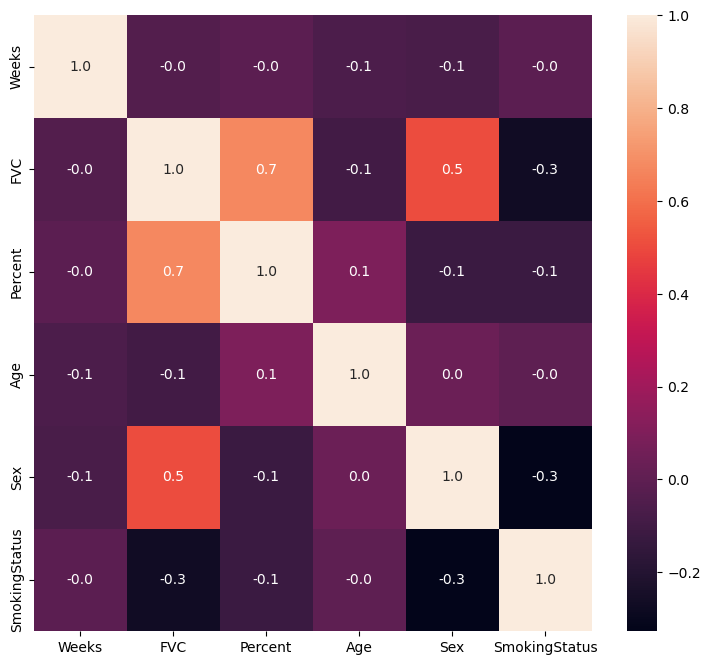

In [41]:
# Finding relations in the data with a heatmap and Pearson correlation
plt.figure(figsize=(9,8))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [42]:
X = data[['Weeks', 'FVC', 'Percent', 'Age', 'Sex', 'SmokingStatus']]
X = X.to_numpy()

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

/Users/alechiquito/anaconda3/envs/tensorflow_1_1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alechiquito/anaconda3/envs/tensorflow_1_1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alechiquito/anaconda3/envs/tensorflow_1_1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alechiquito/anaconda3/envs/tensorflow_1_1/lib/python3.8/site-packa

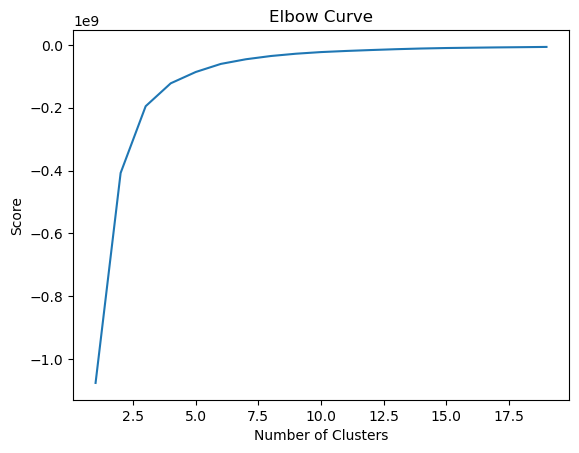

In [44]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [45]:
kmeans_3 = KMeans(n_clusters=3, random_state=0, n_init="auto")
kmeans_3.fit_predict(X)
centroids = kmeans_3.cluster_centers_
print(centroids)

[[3.33987241e+01 1.91938437e+03 6.63583748e+01 6.80127592e+01
  5.67783094e-01 1.39234450e+00]
 [3.12663934e+01 4.09072951e+03 1.01808789e+02 6.61106557e+01
  1.00000000e+00 1.08606557e+00]
 [3.04948755e+01 2.89878184e+03 7.94244264e+01 6.68506589e+01
  9.20937042e-01 1.11859444e+00]]


In [46]:
kmeans_4 = KMeans(n_clusters=3, random_state=0, n_init="auto")
kmeans_4.fit_predict(X)
centroids = kmeans_4.cluster_centers_
print(centroids)

[[3.33987241e+01 1.91938437e+03 6.63583748e+01 6.80127592e+01
  5.67783094e-01 1.39234450e+00]
 [3.12663934e+01 4.09072951e+03 1.01808789e+02 6.61106557e+01
  1.00000000e+00 1.08606557e+00]
 [3.04948755e+01 2.89878184e+03 7.94244264e+01 6.68506589e+01
  9.20937042e-01 1.11859444e+00]]
